In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-white.csv',';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.shape

(4898, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


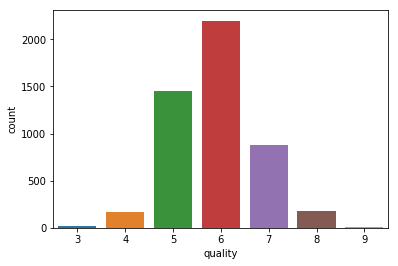

In [5]:
sns.countplot(df['quality'])
plt.show()

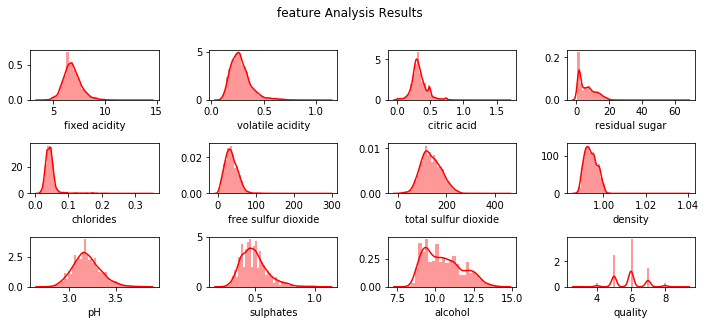

In [6]:
fig = plt.figure(figsize = (10, 20))
j = 0
for i in df:
    plt.subplot(15, 4, j+1)
    j += 1
    sns.distplot(df[i], color='r', label = 'malignant')
fig.suptitle('feature Analysis Results')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [7]:
quality = df["quality"].values
category = []
for num in quality:
    if num < 4:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

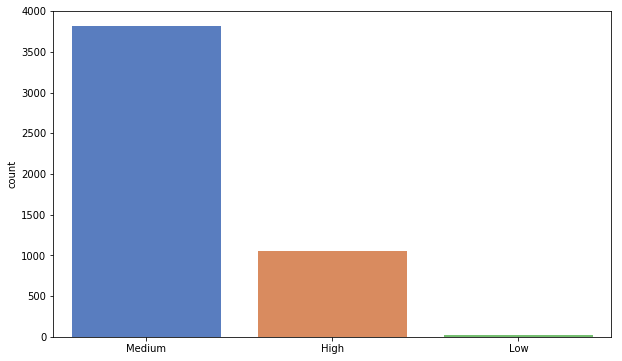

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

In [9]:
quality = df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Midium")
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df, category], axis=1)
data.drop(columns="quality", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import imblearn


In [11]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [12]:
from sklearn.preprocessing import scale
X = scale(X)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(3918, 11) (980, 11) (3918,) (980,)


In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC(C = 1)
model = clf.fit(X_train,y_train)

In [17]:
y_pred = model.predict(X_test)
#y_prob = model.predict_proba(X_test)

In [18]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[ 82,   0, 133],
       [  0,   1,  31],
       [ 35,   0, 698]], dtype=int64)

In [19]:
print('accuracy',metrics.accuracy_score(y_test,y_pred))


accuracy 0.7969387755102041


## K-Fold cross validation

In [20]:
folds = KFold(n_splits = 5,shuffle = True,random_state = 4)

hyper_params = [ {'gamma': [1e-2,1e-3,1e-4],
                 'C': [1,10,100,1000]}]




## GridSearchCV

In [21]:
model = SVC()
model_cv = GridSearchCV(estimator=model, param_grid=hyper_params,
                       scoring='accuracy',
                       cv = folds,
                       verbose=1,
                       return_train_score=True)

In [22]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   57.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [23]:
y_pred_CV = model_cv.predict(X_test)


In [24]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.374782,0.013059,0.049778,0.001159,1,0.01,"{'C': 1, 'gamma': 0.01}",0.776786,0.734694,0.770408,...,0.752674,0.018008,6,0.748883,0.755584,0.757817,0.758214,0.753748,0.754849,0.003390
1,0.374785,0.005761,0.050571,0.001019,1,0.001,"{'C': 1, 'gamma': 0.001}",0.765306,0.728316,0.762755,...,0.745784,0.016363,7,0.740906,0.750160,0.741544,0.745774,0.750558,0.745788,0.004092
2,0.275645,0.006309,0.048572,0.000799,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.765306,0.728316,0.762755,...,0.745784,0.016363,7,0.740906,0.750160,0.741544,0.745774,0.750558,0.745788,0.004092
3,0.403369,0.008683,0.050971,0.004042,10,0.01,"{'C': 10, 'gamma': 0.01}",0.792092,0.765306,0.778061,...,0.774882,0.009765,3,0.779515,0.787811,0.782068,0.786922,0.781499,0.783563,0.003231
4,0.415366,0.027915,0.048975,0.000894,10,0.001,"{'C': 10, 'gamma': 0.001}",0.765306,0.728316,0.762755,...,0.745784,0.016363,7,0.740906,0.750160,0.741544,0.745774,0.750558,0.745788,0.004092
5,0.374588,0.011132,0.052567,0.001486,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.765306,0.728316,0.762755,...,0.745784,0.016363,7,0.740906,0.750160,0.741544,0.745774,0.750558,0.745788,0.004092
6,0.730795,0.015093,0.048369,0.001847,100,0.01,"{'C': 100, 'gamma': 0.01}",0.798469,0.771684,0.781888,...,0.781519,0.009079,2,0.797064,0.804403,0.797703,0.804147,0.801914,0.801046,0.003120
7,0.495323,0.023871,0.049375,0.000802,100,0.001,"{'C': 100, 'gamma': 0.001}",0.780612,0.744898,0.776786,...,0.758033,0.017494,5,0.763242,0.759413,0.764199,0.763955,0.758852,0.761932,0.002314
8,0.721383,0.071988,0.068562,0.007224,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.765306,0.728316,0.762755,...,0.745784,0.016363,7,0.740906,0.750160,0.741544,0.745774,0.750558,0.745788,0.004092
9,2.577715,0.098415,0.047385,0.000485,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.798469,0.781888,0.784439,...,0.785347,0.007256,1,0.821634,0.829611,0.823548,0.823604,0.823923,0.824464,0.002697


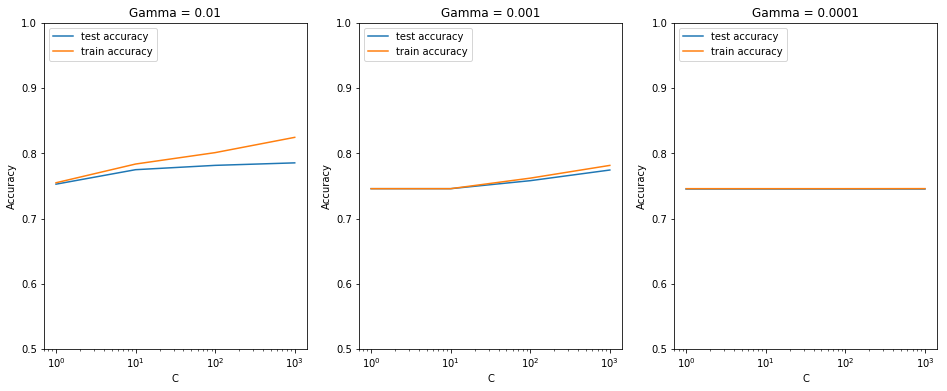

In [25]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

#sbplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01['param_C'],gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'],gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.01')
plt.ylim([0.50,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

#subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001['param_C'],gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'],gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.001')
plt.ylim([0.50,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001['param_C'],gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'],gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.0001')
plt.ylim([0.50,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

In [26]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print('The best test score is {0} corresponding to hyper parameters {1}'.format(best_score,best_hyperparams))

The best test score is 0.7853474339927542 corresponding to hyper parameters {'C': 1000, 'gamma': 0.01}


## Resampling the data:

In [27]:
x_resample,y_resample = SMOTE().fit_resample(X,y)

In [28]:
np.savez('winequality.npz',x_resample,y_resample)

In [29]:
df_over = np.load('winequality.npz')
df_over.files

['arr_0', 'arr_1']

In [30]:
x_over = df_over['arr_0']
y_over = df_over['arr_1']

In [31]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.2)

In [32]:
y_over

array([2, 2, 2, ..., 1, 1, 1])

## Fitting the model after resampling

In [33]:
model_over = SVC()

In [34]:
hyper_params = [ {'gamma': [1e-2,1e-3,1e-4],
                 'C': [1,10,100,1000]}]


In [35]:
model_cv_over = GridSearchCV(estimator=model_over, param_grid=hyper_params,
                       scoring='accuracy',
                       cv = folds,
                       verbose=1,
                       return_train_score=True)

In [36]:
model_cv_over.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  5.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [37]:
y_pred_over = model_cv_over.predict(x_test)

In [38]:
cv_results_over = pd.DataFrame(model_cv_over.cv_results_)
cv_results_over

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.386230,0.248491,0.383784,0.041058,1,0.01,"{'C': 1, 'gamma': 0.01}",0.704843,0.677493,0.682440,...,0.690150,0.010519,6,0.689896,0.694884,0.697207,0.692647,0.691935,0.693314,0.002516
1,2.613498,0.013478,0.377584,0.001166,1,0.001,"{'C': 1, 'gamma': 0.001}",0.668376,0.639886,0.633409,...,0.648768,0.012052,10,0.647428,0.651703,0.657025,0.649045,0.649473,0.650935,0.003337
2,3.639120,0.075107,0.468328,0.030731,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.610826,0.593162,0.588940,...,0.601459,0.010443,12,0.600399,0.606670,0.602593,0.601881,0.603163,0.602941,0.002081
3,1.986662,0.066346,0.306628,0.002472,10,0.01,"{'C': 10, 'gamma': 0.01}",0.740741,0.723077,0.708096,...,0.727085,0.011053,3,0.731937,0.735927,0.738387,0.733970,0.733115,0.734667,0.002270
4,2.388033,0.255803,0.395570,0.055316,10,0.001,"{'C': 10, 'gamma': 0.001}",0.676353,0.650142,0.650513,...,0.660966,0.010644,8,0.659256,0.665527,0.668852,0.662582,0.662154,0.663674,0.003264
5,2.839773,0.165698,0.413560,0.049625,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.660399,0.641595,0.628278,...,0.644777,0.010355,11,0.642582,0.648140,0.653035,0.644486,0.644771,0.646603,0.003681
6,3.172987,0.098525,0.285634,0.021244,100,0.01,"{'C': 100, 'gamma': 0.01}",0.782336,0.760684,0.766249,...,0.770178,0.007692,2,0.784381,0.791506,0.792533,0.785694,0.786834,0.788190,0.003239
7,2.317869,0.045974,0.340005,0.021391,100,0.001,"{'C': 100, 'gamma': 0.001}",0.699715,0.679202,0.683010,...,0.690493,0.009495,5,0.691464,0.698162,0.696352,0.693217,0.690225,0.693884,0.002969
8,2.386230,0.057389,0.362002,0.015520,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.664957,0.643875,0.636260,...,0.648882,0.009508,9,0.645433,0.654126,0.653605,0.649900,0.652038,0.651020,0.003157
9,9.340051,0.261748,0.238470,0.002411,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.825071,0.806268,0.812429,...,0.815777,0.006328,1,0.839818,0.844235,0.844258,0.842548,0.843118,0.842795,0.001628


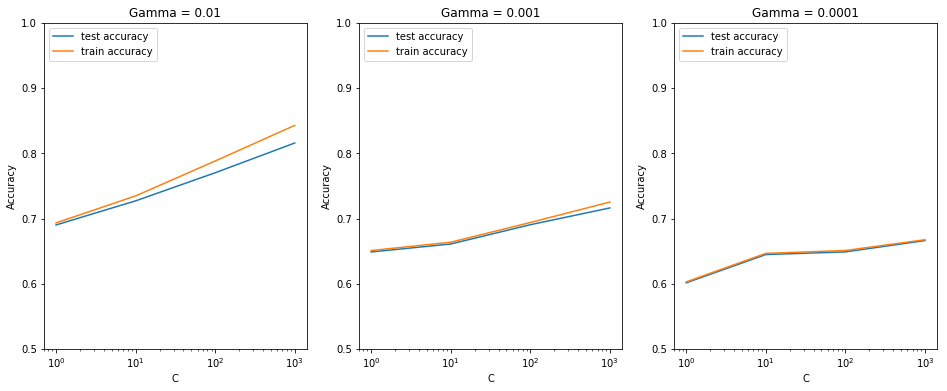

In [43]:
cv_results_over['param_C'] = cv_results_over['param_C'].astype('int')

plt.figure(figsize=(16,6))

#sbplot 1/3
plt.subplot(131)
gamma_01 = cv_results_over[cv_results_over['param_gamma']==0.01]

plt.plot(gamma_01['param_C'],gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'],gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.01')
plt.ylim([0.50,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

#subplot 2/3
plt.subplot(132)
gamma_001 = cv_results_over[cv_results_over['param_gamma']==0.001]

plt.plot(gamma_001['param_C'],gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'],gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.001')
plt.ylim([0.50,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results_over[cv_results_over['param_gamma']==0.0001]

plt.plot(gamma_0001['param_C'],gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'],gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.0001')
plt.ylim([0.50,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

In [40]:
best_score = model_cv_over.best_score_
best_hyperparams = model_cv_over.best_params_

print('The best test score is {0} corresponding to hyper parameters {1}'.format(best_score,best_hyperparams))

The best test score is 0.8157774984000753 corresponding to hyper parameters {'C': 1000, 'gamma': 0.01}
